In [196]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [477]:
df= pd.read_csv('/Users/kavyashreya/Downloads/analytics_test.csv',sep='\t')

It seems like the given file is a .csv file seperated by spaces instead of commas

In [720]:
df.head(5)

,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType,dday,dmonth,bday,bmonth,bdate,ddate,advancebook
0,51b022a5e4b0aaef8f15cdb5,18062077104,2018-06-20 22:16:16,One way,False,12,AMD,DEL,ECONOMY,iximaad,1937,2018-08-07 23:35:00,newUser,7,8,20,6,20-6,7-8,True
1,52381fa4e4b0802b434024be,180625154974,2018-06-25 15:51:48,One way,False,12,DEL,GAU,ECONOMY,iximaad,4633,2018-07-27 12:50:00,oldUser,27,7,25,6,25-6,27-7,True
2,52d952bbe4b0093a9b9cbf78,180612183446,2018-06-12 20:33:36,One way,False,12,PNQ,BLR,ECONOMY,iximaad,3889,2018-06-12 19:55:00,oldUser,12,6,12,6,12-6,12-6,False
3,530779c1e4b00a4950542af3,0506840126041,2018-06-05 23:27:58,One way,False,103,AMD,DEL,ECONOMY,iximaio,11984,2018-06-06 14:10:00,oldUser,6,6,5,6,5-6,6-6,True
4,530779c1e4b00a4950542af3,PRL06E2WAA3,2018-06-19 14:52:46,One way,False,1020,DEL,GAU,ECONOMY,iximaio,6957,2018-06-20 05:20:00,oldUser,20,6,19,6,19-6,20-6,True


In [715]:
df.isInternational.value_counts()

False    5098
Name: isInternational, dtype: int64

In [21]:
df.shape

(5098, 13)

In [22]:
df.isna().sum()

userId             0
bookingId          0
bookingDate        0
journeyType        0
isInternational    0
providerId         0
originCode         0
destinationCode    0
cabinClass         0
devicePlatform     0
totalFare          0
onwardDeparture    0
userType           0
dtype: int64

# 1) What is the percentage of new users in each of the top sectors (Origin-Destination pairs) month-wise?

In [38]:
df1 = df[['bookingDate','originCode','destinationCode','onwardDeparture','userType']]

In [39]:
df1.head()

,bookingDate,originCode,destinationCode,onwardDeparture,userType
0,2018-06-20 22:16:16,AMD,DEL,2018-08-07 23:35:00,newUser
1,2018-06-25 15:51:48,DEL,GAU,2018-07-27 12:50:00,oldUser
2,2018-06-12 20:33:36,PNQ,BLR,2018-06-12 19:55:00,oldUser
3,2018-06-05 23:27:58,AMD,DEL,2018-06-06 14:10:00,oldUser
4,2018-06-19 14:52:46,DEL,GAU,2018-06-20 05:20:00,oldUser


In [50]:
df1['year'] = pd.DatetimeIndex(df1['onwardDeparture']).year
df1['month'] = pd.DatetimeIndex(df1['onwardDeparture']).month
pd.options.mode.chained_assignment = None 

In [44]:
df1.head()

,bookingDate,originCode,destinationCode,onwardDeparture,userType,year,month
0,2018-06-20 22:16:16,AMD,DEL,2018-08-07 23:35:00,newUser,2018,8
1,2018-06-25 15:51:48,DEL,GAU,2018-07-27 12:50:00,oldUser,2018,7
2,2018-06-12 20:33:36,PNQ,BLR,2018-06-12 19:55:00,oldUser,2018,6
3,2018-06-05 23:27:58,AMD,DEL,2018-06-06 14:10:00,oldUser,2018,6
4,2018-06-19 14:52:46,DEL,GAU,2018-06-20 05:20:00,oldUser,2018,6


In [45]:
df1['bookingDate'].dtype

dtype('O')

In [46]:
df1['month'].value_counts()

6     2229
7     2148
8      467
9      128
10      66
11      41
12      15
3        2
1        2
Name: month, dtype: int64

In [47]:
df1['year'].value_counts()

2018    5094
2019       4
Name: year, dtype: int64

All the bookings have been made in the 6th month of 2018 and the journey dates are from june 2018 to march 2019

In [52]:
df1['sector']=df1[['originCode', 'destinationCode']].apply(lambda x: '-'.join(x), axis = 1)

In [54]:
df1['sector'].value_counts()

DEL-AMD    983
AMD-DEL    894
PNQ-BLR    880
BLR-PNQ    859
CCU-DEL    810
DEL-GAU    672
Name: sector, dtype: int64

In [328]:
new=['newUser']
g=df1[df1.userType.isin(new)]

In [336]:
f=g.groupby(by=['sector','month']).size()

In [337]:
f=pd.DataFrame(f)

In [338]:
f #month and sectorwise new users

0
sector  month    
AMD-DEL 6      65
        7      51
        8      11
        9       5
        10      2
        11      2
        12      1
BLR-PNQ 6      55
        7      35
        8       7
        9       1
        10      2
CCU-DEL 1       1
        6      60
        7      53
        8      11
        9       4
        10      8
        11      2
        12      2
DEL-AMD 6      66
        7      63
        8      12
        9       6
        10      2
DEL-GAU 6      77
        7      71
        8      12
        9       4
        10      1
PNQ-BLR 6      56
        7      51
        8      14
        10      1

In [429]:
d=df1.groupby(by=['sector','month','userType']).size()

In [311]:
d=pd.DataFrame(d)

In [324]:
d.head(100)

0
sector  month userType        
AMD-DEL 6     Reactivated    3
              newUser       65
              oldUser      319
        7     Reactivated    3
              newUser       51
              oldUser      322
        8     Reactivated    2
              newUser       11
              oldUser       71
        9     newUser        5
              oldUser       17
        10    newUser        2
              oldUser        9
        11    newUser        2
              oldUser        8
        12    newUser        1
              oldUser        3
BLR-PNQ 6     Reactivated    2
              newUser       55
              oldUser      317
        7     Reactivated    3
              newUser       35
              oldUser      347
        8     newUser        7
              oldUser       63
        9     newUser        1
              oldUser        8
        10    newUser        2
              oldUser       11
        11    oldUser        4
...                        ...
DEL-GAU 6     Reactivated    2
              newUser       77
              oldUser      221
        7     Reactivated    1
              newUser       71
              oldUser      213
        8     Reactivated    2
              newUser       12
              oldUser       34
        9     newUser        4
              oldUser       21
        10    Reactivated    2
              newUser        1
              oldUser        7
        11    oldUser        3
        12    oldUser        1
PNQ-BLR 3     oldUser        1
        6     Reactivated    5
              newUser       56
              oldUser      359
        7     Reactivated    2
              newUser       51
              oldUser      299
        8     Reactivated    1
              newUser       14
              oldUser       77
        9     oldUser        9
        10    newUser        1
              oldUser        1
        11    oldUser        4

[94 rows x 1 columns]

In [292]:
e=df1.pivot_table(index=['month'], columns=['sector'], values=['userType'], aggfunc='count')

In [293]:
e

userType                                        
sector  AMD-DEL BLR-PNQ CCU-DEL DEL-AMD DEL-GAU PNQ-BLR
month                                                  
1           NaN     NaN     1.0     1.0     NaN     NaN
3           NaN     NaN     1.0     NaN     NaN     1.0
6         387.0   374.0   330.0   418.0   300.0   420.0
7         376.0   385.0   341.0   409.0   285.0   352.0
8          84.0    70.0    81.0    92.0    48.0    92.0
9          22.0     9.0    18.0    45.0    25.0     9.0
10         11.0    13.0    24.0     6.0    10.0     2.0
11         10.0     4.0    11.0     9.0     3.0     4.0
12          4.0     4.0     3.0     3.0     1.0     NaN

In [295]:
e.max(axis=1) #count of top sectors

month
1       1.0
3       1.0
6     420.0
7     409.0
8      92.0
9      45.0
10     24.0
11     11.0
12      4.0
dtype: float64

In [308]:
e.idxmax(axis=1) #top sectors month wise

month
1     (userType, CCU-DEL)
3     (userType, CCU-DEL)
6     (userType, PNQ-BLR)
7     (userType, DEL-AMD)
8     (userType, DEL-AMD)
9     (userType, DEL-AMD)
10    (userType, CCU-DEL)
11    (userType, CCU-DEL)
12    (userType, AMD-DEL)
dtype: object

Month wise top sectors :
2018   6th - PNQ-BLR
       7th - DEL-AMD
       8th - *DEL-AMD and PNQ-BLR
       9th - DEL-AMD
       10th- CCU-DEL
       11th- CCU-DEL
       12th- *AMD-DEL and BLR-PNQ
2019   1st - DEL-AMD and *CCU-DEL
       3rd - PNQ-BLR and *CCU-DEL

*lets consider these the top sector for percentage calculation

In [351]:
June18=(56/420)*100 #percentage calculation
July18=(66/409)*100
aug18=(63/92)*100
sept18=(12/45)*100
oct18=(8/24)*100
nov18=(2/11)*100
dec18=(1/4)*100
Jan19=(1/1)*100
Feb19=(0/1)*100

In [358]:
print('''the month wise percentage of new users per top sector: 
2018   6th - PNQ-BLR :%(f)d percent
       7th - DEL-AMD :%(a)d percent
       8th - DEL-AMD :%(b)d percent
       9th - DEL-AMD :%(c)d percent
       10th- CCU-DEL :%(d)d percent
       11th- CCU-DEL :%(e)d percent
       12th- AMD-DEL :%(g)d percent
2019   1st - CCU-DEL :%(h)d percent
       3rd - CCU-DEL :%(i)d percent'''%{'f':June18,
'a':July18,
'b':aug18,
'c':sept18,
'd':oct18,
'e':nov18,
'g':dec18,
'h':Jan19,
'i':Feb19})

the month wise percentage of new users per top sector: 
2018   6th - PNQ-BLR :13 percent
       7th - DEL-AMD :16 percent
       8th - DEL-AMD :68 percent
       9th - DEL-AMD :26 percent
       10th- CCU-DEL :33 percent
       11th- CCU-DEL :18 percent
       12th- AMD-DEL :25 percent
2019   1st - CCU-DEL :100 percent
       3rd - CCU-DEL :0 percent


# 2) Find the number of users who have booked more than twice on our Web platforms?


In [657]:
web=['ixiweb','iximweb']
df2=df[df.devicePlatform.isin(web)] #seperating web users

In [658]:
df['devicePlatform'].value_counts()

iximaad    2890
iximaio     852
ixiweb      791
iximatr     346
iximweb     218
mmxmatr       1
Name: devicePlatform, dtype: int64

User Ids can be used to identify users who have booked more than twice on the platform. all other device platforms have been eliminated and the frequency of userIds are calculated

In [659]:
count = df2['userId'].value_counts()

In [661]:
len(count[count > 2] )  #filtering users that have booked more than twice

31

There are 31 users who have booked more than twice on the web platforms

# 3) What is trend for Advance Bookers.

All bookings have been made in the month of june. Any booking made for travelling in the subsequent months can be conseidered advance booking. Another way can be to consider bookings not made for travelling on the same day as advanced booking.Lets consider the latter in this case

On further investigation I realized that there are some bookings that have been made for travelling the next day, or after two days. My logic says that they should also not be considered as advance booking  but since the definition of "advance booking" has not been explicitly defined , i will ignore that for now, although it can always be incorporated later.

In [485]:
df3=df

In [486]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5098 entries, 0 to 5097
Data columns (total 13 columns):
userId             5098 non-null object
bookingId          5098 non-null object
bookingDate        5098 non-null object
journeyType        5098 non-null object
isInternational    5098 non-null bool
providerId         5098 non-null int64
originCode         5098 non-null object
destinationCode    5098 non-null object
cabinClass         5098 non-null object
devicePlatform     5098 non-null object
totalFare          5098 non-null int64
onwardDeparture    5098 non-null object
userType           5098 non-null object
dtypes: bool(1), int64(2), object(10)
memory usage: 483.0+ KB


In [487]:
df3['bookingDate'] = pd.to_datetime(df3['bookingDate'])
df3['onwardDeparture'] = pd.to_datetime(df3['onwardDeparture'])

In [488]:
df3['bookingDate'].dtype

dtype('<M8[ns]')

In [489]:
df3['dday'] = pd.DatetimeIndex(df3['onwardDeparture']).day
df3['dmonth'] = pd.DatetimeIndex(df3['onwardDeparture']).month
df3['bday'] = pd.DatetimeIndex(df3['bookingDate']).day
df3['bmonth'] = pd.DatetimeIndex(df3['bookingDate']).month
df3['dday']=df3['dday'].astype(str)
df3['dmonth']=df3['dmonth'].astype(str)
df3['bday']=df3['bday'].astype(str)
df3['bmonth']=df3['bmonth'].astype(str)


In [490]:
df3['bdate']=df3[['bday', 'bmonth']].apply(lambda x: '-'.join(x), axis = 1)
df3['ddate']=df3[['dday', 'dmonth']].apply(lambda x: '-'.join(x), axis = 1)

In [491]:
Sameday_booking=df3[df3['bdate']==df3['ddate']]

In [439]:
Sameday_booking

,userId,bookingId,bookingDate,journeyType,isInternational,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,onwardDeparture,userType,dday,dmonth,bday,bmonth,ddate,bdate,advancebook
2,52d952bbe4b0093a9b9cbf78,180612183446,2018-06-12 20:33:36,One way,False,12,PNQ,BLR,ECONOMY,iximaad,3889,2018-06-12 19:55:00,oldUser,12,6,12,6,12-6,12-6,False
5,530b3f8be4b05f086b0f147e,180605610826,2018-06-05 17:52:58,One way,False,12,AMD,DEL,ECONOMY,ixiweb,6517,2018-06-05 14:50:00,oldUser,5,6,5,6,5-6,5-6,False
47,54e04b79e4b03b0761d29ea5,18062631740,2018-06-26 08:32:13,One way,False,12,PNQ,BLR,ECONOMY,iximaad,4370,2018-06-26 19:55:00,oldUser,26,6,26,6,26-6,26-6,False
51,54e5f2dfe4b0c99055e1bd29,5000453,2018-06-22 18:32:51,One way,False,196,CCU,DEL,ECONOMY,iximaad,23744,2018-06-22 14:55:00,oldUser,22,6,22,6,22-6,22-6,False
111,556ea8a0e4b007d26d724e80,18061958684,2018-06-19 15:54:11,One way,False,12,DEL,AMD,ECONOMY,iximaio,3512,2018-06-19 12:45:00,oldUser,19,6,19,6,19-6,19-6,False
133,558ba2fce4b0e18e70041d3b,EMT48427287,2018-06-24 12:50:05,One way,False,205,PNQ,BLR,ECONOMY,iximaio,3489,2018-06-24 19:55:00,oldUser,24,6,24,6,24-6,24-6,False
165,55c8303fe4b0b64405f946fd,18060910780,2018-06-09 00:48:20,One way,False,12,PNQ,BLR,ECONOMY,iximweb,5623,2018-06-09 00:25:00,oldUser,9,6,9,6,9-6,9-6,False
225,561661d576d99d614bd249bd,180615156990,2018-06-15 16:55:50,One way,False,12,AMD,DEL,ECONOMY,ixiweb,4969,2018-06-15 16:45:00,oldUser,15,6,15,6,15-6,15-6,False
231,5623379a07986b4a508c7894,18062078922,2018-06-20 23:51:46,Return,False,12,BLR,PNQ,ECONOMY,iximaad,7151,2018-06-20 23:55:00,oldUser,20,6,20,6,20-6,20-6,False
234,56286d932455be4632663d9d,18061181952,2018-06-11 22:28:22,One way,False,12,PNQ,BLR,ECONOMY,iximaad,3889,2018-06-11 19:55:00,oldUser,11,6,11,6,11-6,11-6,False


In [492]:
Sameday_booking.shape

(298, 19)

In [502]:
df3['advancebook']=np.where(df3['bdate']==df3['ddate'], False, True)

In [499]:
df3['journeyType'].value_counts()

One way    4711
Return      387
Name: journeyType, dtype: int64

In [500]:
df3['providerId'].value_counts()

12      3408
1020     481
196      428
103      392
205      353
1         36
Name: providerId, dtype: int64

In [501]:
df3['cabinClass'].value_counts()

ECONOMY            5084
PREMIUM_ECONOMY      13
BUSINESS              1
Name: cabinClass, dtype: int64

Lets start with a little EDA and drop the columns that do not seem to be relevent

In [445]:
drop_col=['bookingId','bookingDate','userId','isInternational','onwardDeparture']
df3a=df3.drop(drop_col, axis=1)

Text(0.5, 1.0, 'Distribution of advance and sameday bookers')

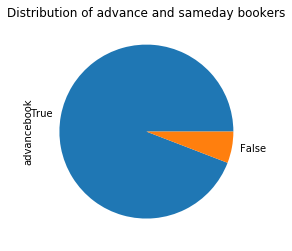

In [446]:
df3['advancebook'].value_counts().plot.pie();plt.title('Distribution of advance and sameday bookers')

we can see that more people tend to book tickets in advance. 4800 people booked their tickets in advance.

In [447]:
df3=df3[df3['advancebook']==True] #same day booking records have been removed so that we can focus on advance bookers

In [448]:
df3a.head(10)

,journeyType,providerId,originCode,destinationCode,cabinClass,devicePlatform,totalFare,userType,dday,dmonth,bday,bmonth,ddate,bdate,advancebook
0,One way,12,AMD,DEL,ECONOMY,iximaad,1937,newUser,7,8,20,6,7-8,20-6,True
1,One way,12,DEL,GAU,ECONOMY,iximaad,4633,oldUser,27,7,25,6,27-7,25-6,True
2,One way,12,PNQ,BLR,ECONOMY,iximaad,3889,oldUser,12,6,12,6,12-6,12-6,False
3,One way,103,AMD,DEL,ECONOMY,iximaio,11984,oldUser,6,6,5,6,6-6,5-6,True
4,One way,1020,DEL,GAU,ECONOMY,iximaio,6957,oldUser,20,6,19,6,20-6,19-6,True
5,One way,12,AMD,DEL,ECONOMY,ixiweb,6517,oldUser,5,6,5,6,5-6,5-6,False
6,One way,12,DEL,AMD,ECONOMY,ixiweb,6361,oldUser,8,6,7,6,8-6,7-6,True
7,One way,12,CCU,DEL,ECONOMY,iximatr,4798,newUser,27,6,18,6,27-6,18-6,True
8,One way,196,PNQ,BLR,ECONOMY,iximatr,11470,oldUser,10,6,6,6,10-6,6-6,True
9,One way,196,BLR,PNQ,ECONOMY,iximweb,3674,newUser,24,7,7,6,24-7,7-6,True


totalFare is the dependent variable in this dataset

In [449]:
df3['totalFare'].describe()

count     4800.000000
mean      4164.843750
std       3178.097524
min       1489.000000
25%       2187.000000
50%       3199.000000
75%       5015.000000
max      39474.000000
Name: totalFare, dtype: float64

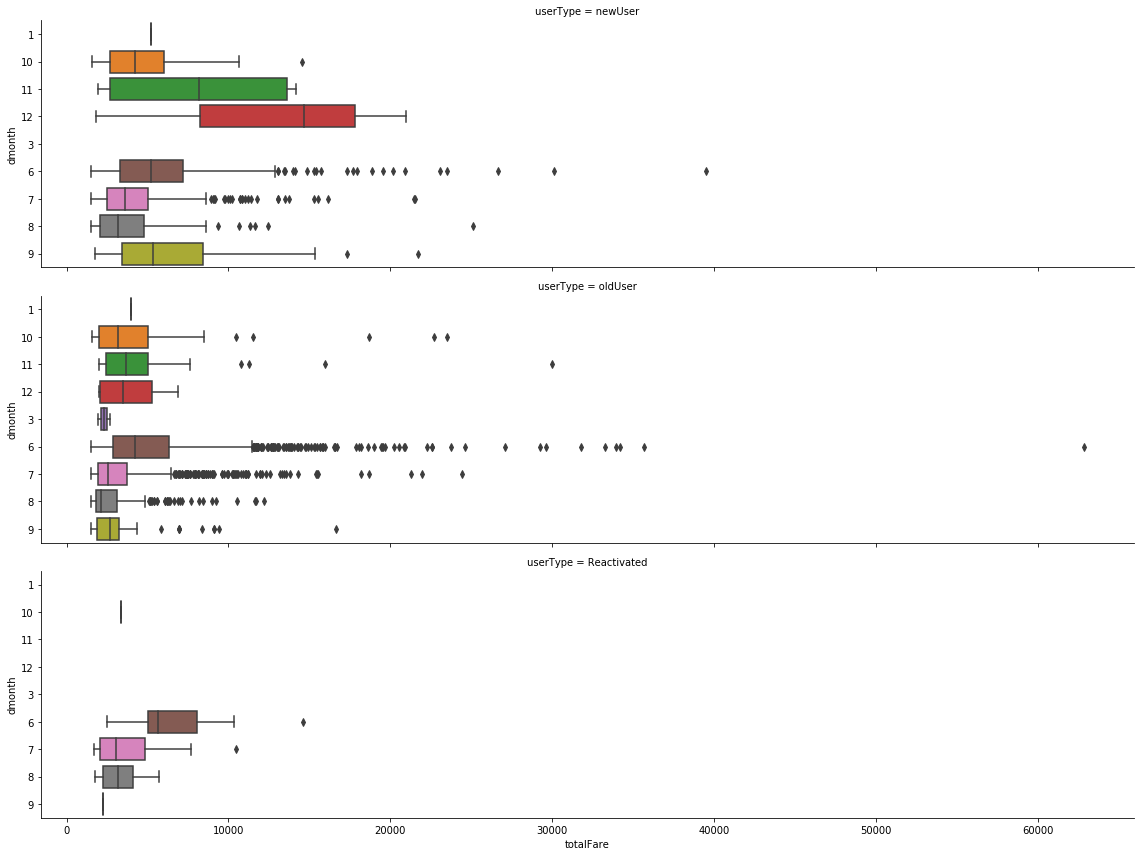

In [598]:
sns.catplot(x="totalFare", y="dmonth", row="userType",
                kind="box", orient="h", height=4, aspect=4,data=df3)

A lot of outliers can be seen in the 6th month of 2018, which is to be expected since airlines have dynamic pricing

The highest fare paid amongst advance bookers is 39474 and the lowest is 1489. Most advance bookers tend to book fares in the 3k-4k range

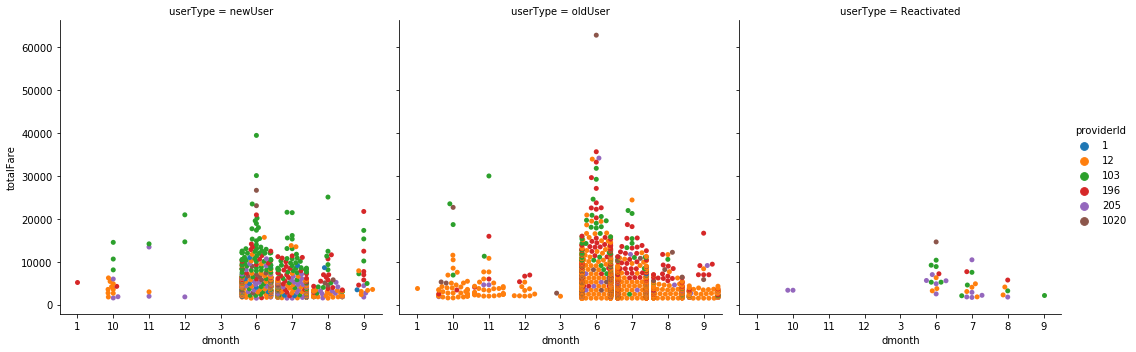

In [718]:
sns.catplot(x="dmonth", y="totalFare", hue="providerId",col='userType', kind="swarm", data=df3)

Most Old users seem to take the services of provider 12. The highest fare paid was in the month of June 2018 and the least fare paid was in the month of march 2019. provider 103 seems to charge fares on the higher side

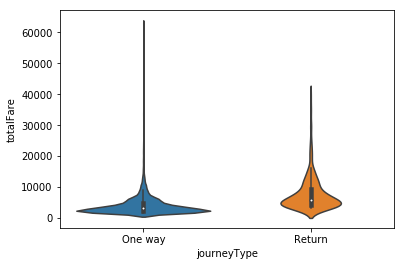

In [719]:
sns.violinplot(x=df3.journeyType, y=df3.totalFare)

Text(0.5, 1.0, 'Journey type')

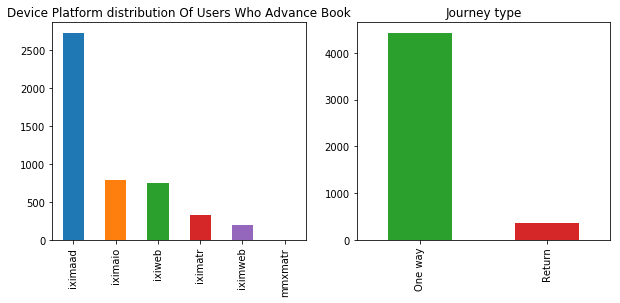

In [430]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1);df3.devicePlatform.value_counts().plot(kind='bar', color=['C0', 'C1','C2','C3','C4']); plt.title('Device Platform distribution Of Users Who Advance Book')
plt.subplot(1,2,2);df3.journeyType.value_counts().plot(kind='bar', color=['C2', 'C3']); plt.title('Journey type')

More people tend to book one way tickets on the android flights app

Text(0.5, 1.0, 'month wise mean fare')

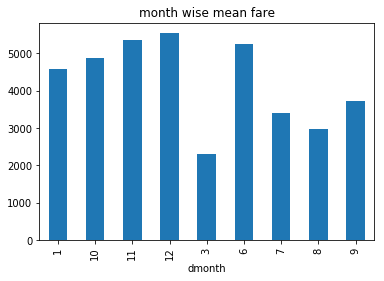

In [457]:
df3.groupby('dmonth').totalFare.mean().plot.bar();plt.title('month wise mean fare')

The highest mean fare is in dec 2018

Text(0.5, 1.0, 'User Type distribution')

<Figure size 432x288 with 0 Axes>

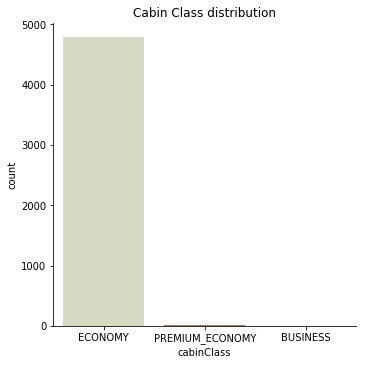

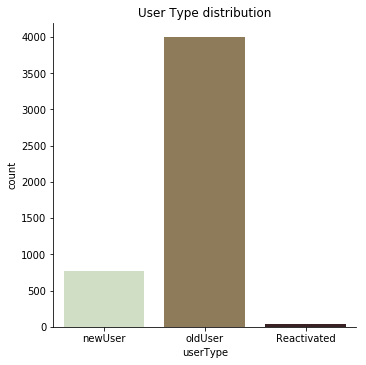

In [476]:
plt.figure(figsize=(6,4))
plt.subplot;sns.catplot(x="cabinClass", kind="count", palette="ch:.500", data=df3);plt.title('Cabin Class distribution')
plt.subplot;sns.catplot(x="userType", kind="count", palette="ch:.700", data=df3);plt.title('User Type distribution')

Most advance bookers are oldusers and travel in economy class

# 4)What percentage of bookings do we get through apps (Android + Ios)?


In [197]:
apps=['iximaad','iximaio','iximatr'] 
df4=df[df.devicePlatform.isin(apps)] #subdataframe created that only contains android and ios users

In [202]:
a=df4.shape[0] #no. of android + ios users

In [204]:
b=df.shape[0] #total no. of users

In [205]:
percentage_bookings=(a/b)*100

In [206]:
pecentage_bookings

80.18830914083954

# 5) Number of users who reactivate their account per month?

I feel like there is an error in this question as all the bookings in the dataset have been made in the same month,only the journey month differs. A user will reactivate their account at the time of making a booking only. Therefore all users(36) reactivated their account in the month of june 2018 only. But for the sake of argument lets take the month of journey into account and solve this problem

In [207]:
df5=df[['onwardDeparture','userType']]

In [208]:
df5['year'] = pd.DatetimeIndex(df5['onwardDeparture']).year
df5['month'] = pd.DatetimeIndex(df5['onwardDeparture']).month #separate the month from the timestamp

In [210]:
users=['Reactivated']
df5=df5[df5.userType.isin(users)] #separate reactivated users

In [218]:
df5.shape

(36, 4)

In [216]:
c=df5.groupby(['month']).size()

In [217]:
c

month
6     15
7     13
8      5
9      1
10     2
dtype: int64

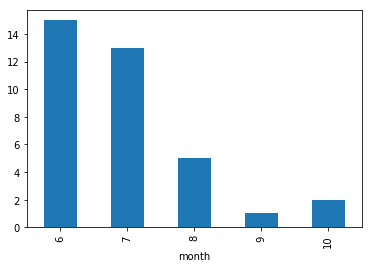

In [422]:
c.plot.bar() #plot of monthwise reactivated user count

# 6)If you want to make cohorts of users who are likely to book international tickets, how would you identify and target them? Any one approach with proper explanation.

Since the given dataset does not contain any info about users booking international tickets, Lets explore other possibilities 

In [459]:
df.destinationCode.unique()

array(['DEL', 'GAU', 'BLR', 'AMD', 'PNQ'], dtype=object)

In [481]:
df1['sector'].unique()

array(['AMD-DEL', 'DEL-GAU', 'PNQ-BLR', 'DEL-AMD', 'CCU-DEL', 'BLR-PNQ'],
      dtype=object)

According to statistics the busiest airport is DEL followed by BLR, AMD, PNQ and GAU
Delhi and bangalore handles a major proportion of international traffic

In [528]:
df['devicePlatform'].unique()

array(['iximaad', 'iximaio', 'ixiweb', 'iximatr', 'iximweb', 'mmxmatr'],
      dtype=object)

In [685]:
we=['ixiweb','iximweb','mmxmatr','iximaad', 'iximaio']
df6=df[df.devicePlatform.isin(we)]
des=['DEL', 'BLR', 'AMD', 'PNQ']
df6=df6[df6.destinationCode.isin(des)]
df6=df6[df6['advancebook']==True]

In [686]:
df6=df6[['userId','bookingId','journeyType','cabinClass','devicePlatform','bookingDate','destinationCode','onwardDeparture','totalFare','dmonth']]

In [687]:
pd.to_datetime(df6.onwardDeparture)
pd.to_datetime(df6.bookingDate)

0      2018-06-20 22:16:16
3      2018-06-05 23:27:58
6      2018-06-07 04:45:52
9      2018-06-07 19:47:54
10     2018-06-15 21:27:00
11     2018-06-12 08:12:59
12     2018-06-15 18:22:20
13     2018-06-28 14:13:15
14     2018-06-28 08:44:05
15     2018-06-15 21:25:22
16     2018-06-21 17:43:11
17     2018-06-23 01:19:44
19     2018-06-18 20:11:23
20     2018-06-07 13:10:59
22     2018-06-30 15:10:05
23     2018-06-23 21:56:53
24     2018-06-28 12:38:43
25     2018-06-27 12:38:46
26     2018-06-10 13:12:27
27     2018-06-26 22:13:41
28     2018-06-14 00:06:54
31     2018-06-18 10:32:09
32     2018-06-29 10:34:08
34     2018-06-17 12:55:55
36     2018-06-09 06:10:12
37     2018-06-30 21:55:25
38     2018-06-27 09:55:05
39     2018-06-18 11:40:06
40     2018-06-16 14:39:12
41     2018-06-06 23:36:37
               ...        
5058   2018-06-30 10:02:12
5059   2018-06-30 10:27:00
5060   2018-06-28 20:59:29
5061   2018-06-29 18:33:17
5063   2018-06-28 22:20:05
5064   2018-06-28 22:33:37
5

In [688]:
i=df6.sort_values(by=['userId'])

In [689]:
coun = df6['userId'].value_counts()

In [690]:
len(coun[coun>2])

150

In [691]:
len(coun[coun>1])

715

In [692]:
df6['cabinClass'].value_counts()

ECONOMY            3910
PREMIUM_ECONOMY       5
BUSINESS              1
Name: cabinClass, dtype: int64

In [693]:
df6['freqgroup']=df.groupby('userId')['onwardDeparture'].transform(len)

In [698]:
df6.head(5)

,userId,bookingId,journeyType,cabinClass,devicePlatform,bookingDate,destinationCode,onwardDeparture,totalFare,dmonth,freqgroup
0,51b022a5e4b0aaef8f15cdb5,18062077104,One way,ECONOMY,iximaad,2018-06-20 22:16:16,DEL,2018-08-07 23:35:00,1937,8,1
3,530779c1e4b00a4950542af3,0506840126041,One way,ECONOMY,iximaio,2018-06-05 23:27:58,DEL,2018-06-06 14:10:00,11984,6,2
6,530b3f8be4b05f086b0f147e,18060720692,One way,ECONOMY,ixiweb,2018-06-07 04:45:52,AMD,2018-06-08 23:30:00,6361,6,2
9,534d3031e4b0c5fb4d34bc0e,4703645,One way,ECONOMY,iximweb,2018-06-07 19:47:54,PNQ,2018-07-24 18:00:00,3674,7,1
10,535195a8e4b05e8983ce9848,180615174724,Return,ECONOMY,iximaad,2018-06-15 21:27:00,DEL,2018-06-20 01:20:00,12024,6,1


In [711]:
df6.query('freqgroup == 5')

,userId,bookingId,journeyType,cabinClass,devicePlatform,bookingDate,destinationCode,onwardDeparture,totalFare,dmonth,freqgroup
202,5602e27bf5cef81cb06fb9db,PRL06CK3E1J,One way,ECONOMY,iximaio,2018-06-10 13:12:38,DEL,2018-07-07 00:05:00,2131,7,5
203,5602e27bf5cef81cb06fb9db,18061142292,One way,ECONOMY,iximaio,2018-06-11 09:28:15,AMD,2018-07-16 02:10:00,2321,7,5
204,5602e27bf5cef81cb06fb9db,18062062816,Return,ECONOMY,ixiweb,2018-06-20 18:25:15,DEL,2018-06-25 03:10:00,6356,6,5
205,5602e27bf5cef81cb06fb9db,18062071416,One way,ECONOMY,ixiweb,2018-06-20 18:31:01,DEL,2018-06-25 03:10:00,3682,6,5
206,5602e27bf5cef81cb06fb9db,180621147730,One way,ECONOMY,iximaio,2018-06-21 16:27:29,AMD,2018-06-29 00:50:00,2614,6,5
1068,58a3ce09f3efe817b588528b,18060783206,One way,ECONOMY,iximaad,2018-06-07 19:47:14,DEL,2018-07-09 00:35:00,1749,7,5
1069,58a3ce09f3efe817b588528b,180608184526,One way,ECONOMY,iximaad,2018-06-08 20:48:26,AMD,2018-07-30 00:50:00,1549,7,5
1070,58a3ce09f3efe817b588528b,180612141980,One way,ECONOMY,iximaad,2018-06-12 09:03:29,AMD,2018-08-03 13:20:00,1692,8,5
1071,58a3ce09f3efe817b588528b,18062656262,One way,ECONOMY,iximaad,2018-06-26 16:03:38,DEL,2018-07-17 00:45:00,1793,7,5
1072,58a3ce09f3efe817b588528b,180627164156,One way,ECONOMY,iximaad,2018-06-27 15:46:57,AMD,2018-08-24 13:40:00,1557,8,5


In [712]:
df6.query('freqgroup == 2')

,userId,bookingId,journeyType,cabinClass,devicePlatform,bookingDate,destinationCode,onwardDeparture,totalFare,dmonth,freqgroup
3,530779c1e4b00a4950542af3,0506840126041,One way,ECONOMY,iximaio,2018-06-05 23:27:58,DEL,2018-06-06 14:10:00,11984,6,2
6,530b3f8be4b05f086b0f147e,18060720692,One way,ECONOMY,ixiweb,2018-06-07 04:45:52,AMD,2018-06-08 23:30:00,6361,6,2
16,539ebd4ce4b0ad06be2de9d7,4978770,One way,ECONOMY,iximaad,2018-06-21 17:43:11,PNQ,2018-07-19 17:15:00,1969,7,2
17,539ebd4ce4b0ad06be2de9d7,18062310860,One way,ECONOMY,iximaad,2018-06-23 01:19:44,BLR,2018-07-24 00:25:00,1951,7,2
23,5430dbf8e4b059cd10dabf08,5024022,Return,ECONOMY,iximaad,2018-06-23 21:56:53,DEL,2018-09-08 00:35:00,6956,9,2
24,5430dbf8e4b059cd10dabf08,5124003,One way,ECONOMY,iximaad,2018-06-28 12:38:43,AMD,2018-09-10 13:40:00,3256,9,2
46,54e04b79e4b03b0761d29ea5,180617155932,One way,ECONOMY,iximaad,2018-06-17 23:01:28,PNQ,2018-06-19 18:55:00,6018,6,2
49,54e38115e4b0c99055e1b632,18062243908,One way,ECONOMY,iximaio,2018-06-22 15:36:30,DEL,2018-06-26 04:30:00,6325,6,2
50,54e38115e4b0c99055e1b632,18062244190,One way,ECONOMY,iximaio,2018-06-22 15:44:41,DEL,2018-06-26 04:30:00,6325,6,2
52,54eacfbee4b0911a32b2ad20,180615149106,One way,ECONOMY,ixiweb,2018-06-15 13:07:59,PNQ,2018-07-09 11:25:00,2058,7,2


In [599]:
y=df6[df6['journeyType']=='Return']

In [600]:
y['cabinClass'].value_counts()

ECONOMY            345
PREMIUM_ECONOMY      1
Name: cabinClass, dtype: int64

In [601]:
y=y.groupby('dmonth').userId.value_counts()

In [608]:
x=df6.groupby('userId').destinationCode.value_counts()

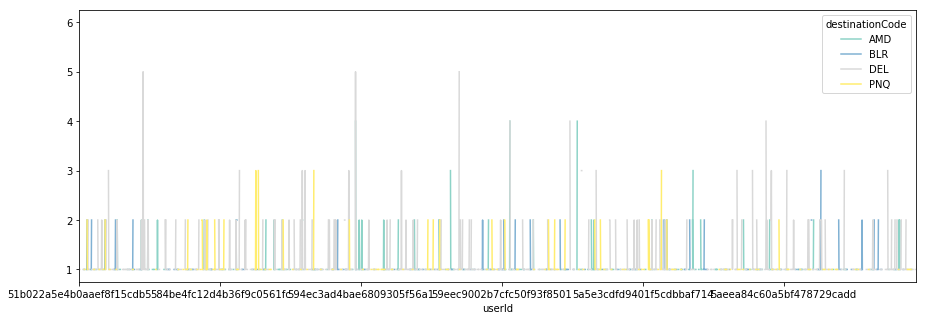

In [619]:
x.unstack().plot(colormap="Set3",figsize=(15,5))

All the destinations are international airports and some users have booked round trip tickets. Some users have also booked tickets more than once. So my primary reasoning is that, if i were to travel to an international destination i can travel for business, work, Leisure  or study. There is a specific time frame in which such users will tend to return. 
* Students will likely book one way tickets and travel economy
* People going on business trips or vacation will likely book a ticket back to their orignal destination.Such people will likely return in 4 to 21 days and can travel premium or business class
* It is unlikely that a person going from DEL to GAU will book an international ticket
* people booking on iximatr-Android Trains App will probably not book international tickets
* Most international travel is pre planned and it is unlikely that a person will book international travel tickets on the same day, therefore sameday bookings can be ignored
* People travelling to delhi and bengaluru are likely to go for international travel since most international air traffic is observed on these routes according to statistics. The frequency of airlines flying out of these airports is also higher. So internatinal travellers might first go to these airports and then continue their international journey
* people going from delhi to AMD and returing are unlikely to book international tickets. Same goes for people going from Bengaluru to Pune.


Cohorts of users :
    * Students will likely travel at the start of academic year/semester i.e june and dec and will likely travel to DEL/BLR via economy. The tickets will be one way and the fare will be around the average fare
    * people booking multiple tickets for travelling domestically within the year are unlikely to go for international travel and can be ignored. eg, a user making 5 bookings for travelling on different days. 
    * People going to delhi and then returning back to the original destination after a period of time might go for international travel.
    * looking at the timestamps of onward journey, we can target people who have booked sets of tickets 4-21 days       apart.we can ignore users that are returning within a day or two as international travel is unlikely in such a small timeframe
    * if multiple bookings have been made by the same user for travelling to the same destination on a particular day, it is likely that a family is going for vacation and they might go to an international destination

Approach : The time stamp of all travel records of a particular user can be analyzed to understand if the user is likely to travel domestic or go for international travel. If the user has booked a oneway ticket only once to delhi or Bengaluru, they may or may not book an international ticket. But if they are booking more than one ticket, we can analyze if there are groups of tickets booked for travelling on the same day or if there is a certain time period separating the bookings. If the user is returning within a day or two, they can be ignored, whereas if there is an appreciable time gap(upto 3 to 4weeks) beetween the bookings and they are to and from from the same pair of airports then the user might go for international travel. If there are several bookings to and fro from different airports then the user is probably a domestic traveller and can be ignored

Now that cohorts of users have been identified we can target them with the help of:
    * Email push notifications
    * Attractive coupon based discounts
    * Campaigns highlighting price competitiveness
    * Offering free lounge services for layovers 
    * Use hotel booking data to target plausible travel destinations
    * Improve user experience by fast tracking ticket purchasing
    * Student discount on international travel during specific months